<a href="https://colab.research.google.com/github/beolawork-art/Indicino-Employee-Attrition-Predictive-Analysis/blob/main/Indicino_Employee_Attrition_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
df = pd.read_excel("Indicino project.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# --- 1. Label Encoding for Binary Columns ---
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Over18'] = df['Over18'].replace({'Y': 1}) # Likely all 'Y'


# --- 2. One-Hot Encoding for Multi-Category Columns ---
# Identify all remaining object columns
object_cols = df.select_dtypes(include='object').columns

# Convert them to new 0/1 columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)


# Show the new, numerical data information
print("--- Transformed DataFrame Info ---")
print(df.info())

--- Transformed DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-nul

/tmp/ipython-input-1726340682.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1726340682.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1726340682.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

The overall Attrition Rate is: 16.12%


/tmp/ipython-input-2466157360.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette=['#1f77b4', '#ff7f0e'])


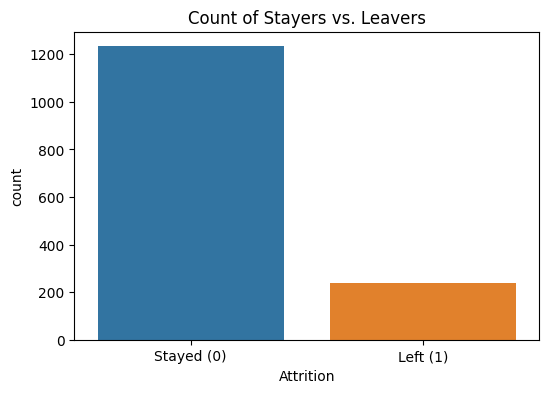

In [ ]:
# --- A. Overall Attrition Rate ---
attrition_rate = df['Attrition'].mean() * 100
print(f"The overall Attrition Rate is: {attrition_rate:.2f}%")

# Visualize the split between stayers (0) and leavers (1)
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count of Stayers vs. Leavers')
plt.xticks([0, 1], ['Stayed (0)', 'Left (1)'])
plt.show()


Attrition Rate (%) by OverTime (0=No, 1=Yes):
 OverTime
0    10.436433
1    30.528846
Name: Attrition, dtype: float64


/tmp/ipython-input-3727257986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='coolwarm')


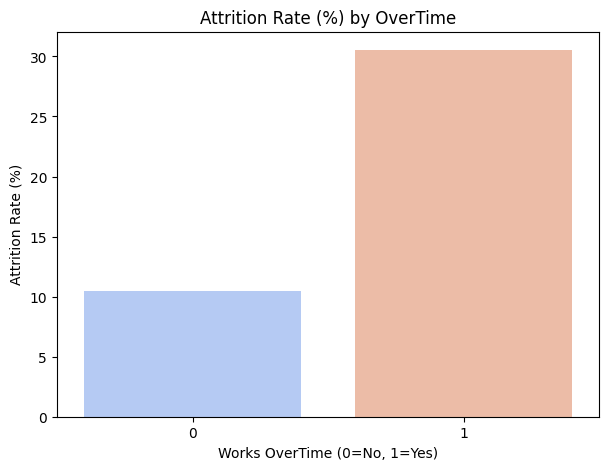

In [ ]:
# --- B. Attrition by OverTime ---
overtime_attrition = df.groupby('OverTime')['Attrition'].mean() * 100

print("\nAttrition Rate (%) by OverTime (0=No, 1=Yes):\n", overtime_attrition)

plt.figure(figsize=(7, 5))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='coolwarm')
plt.title('Attrition Rate (%) by OverTime')
plt.xlabel('Works OverTime (0=No, 1=Yes)')
plt.ylabel('Attrition Rate (%)')
plt.show()


Average Monthly Income (Stayers vs. Leavers):
 Attrition
0    6832.739659
1    4787.092827
Name: MonthlyIncome, dtype: float64


/tmp/ipython-input-117973470.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_comparison.index, y=income_comparison.values, palette=['#1f77b4', '#ff7f0e'])


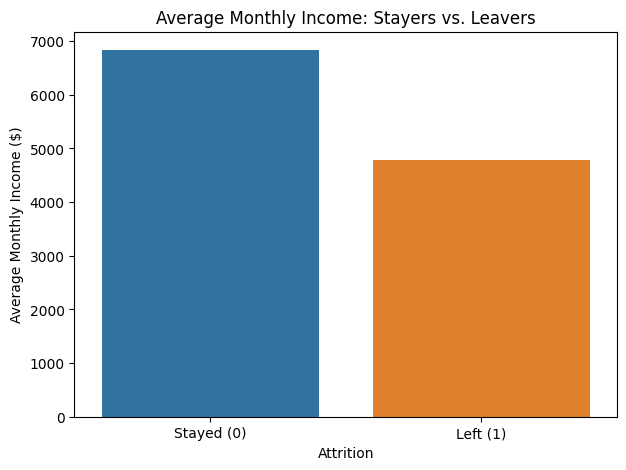

In [ ]:
# --- C. Attrition by Monthly Income ---
income_comparison = df.groupby('Attrition')['MonthlyIncome'].mean()

print("\nAverage Monthly Income (Stayers vs. Leavers):\n", income_comparison)

plt.figure(figsize=(7, 5))
sns.barplot(x=income_comparison.index, y=income_comparison.values, palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Monthly Income: Stayers vs. Leavers')
plt.xticks([0, 1], ['Stayed (0)', 'Left (1)'])
plt.ylabel('Average Monthly Income ($)')
plt.show()


Attrition Rate (%) by Age Band:
 Age_Band
18-24    39.175258
25-34    20.216606
35-44    10.099010
45-54    10.204082
55+      15.942029
Name: Attrition, dtype: float64


/tmp/ipython-input-570290547.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_band_attrition.index, y=age_band_attrition.values, palette='viridis')


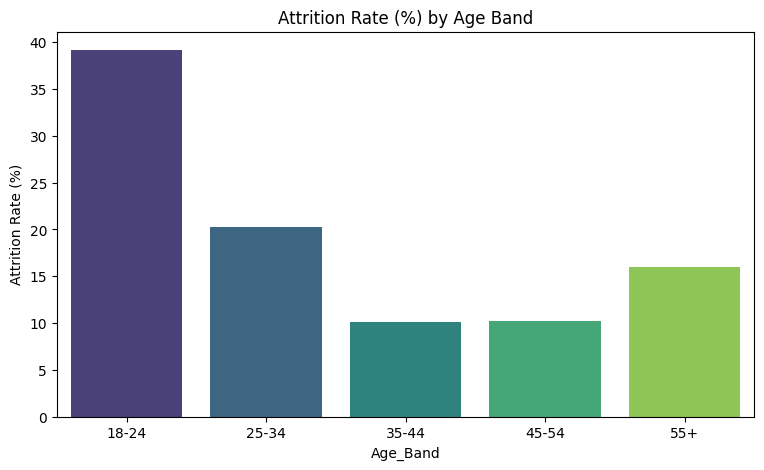

In [ ]:
# --- D. Attrition by Age Band ---
# Create age bands
bins = [18, 25, 35, 45, 55, 61]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age_Band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_band_attrition = df.groupby('Age_Band', observed=True)['Attrition'].mean() * 100

print("\nAttrition Rate (%) by Age Band:\n", age_band_attrition)

plt.figure(figsize=(9, 5))
sns.barplot(x=age_band_attrition.index, y=age_band_attrition.values, palette='viridis')
plt.title('Attrition Rate (%) by Age Band')
plt.ylabel('Attrition Rate (%)')
plt.show()

--- Attrition Rate (%) by Job Role (Case Q2) ---
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
dtype: float64


/tmp/ipython-input-329633368.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_attrition.index, y=job_attrition.values, palette='plasma')


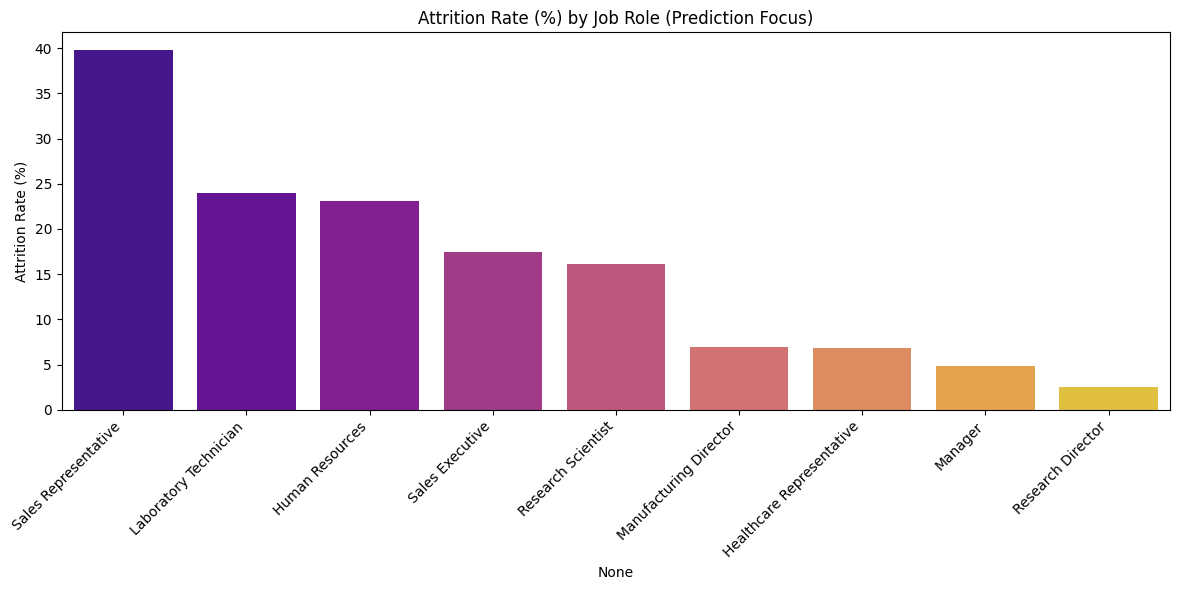

/tmp/ipython-input-329633368.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='muted')


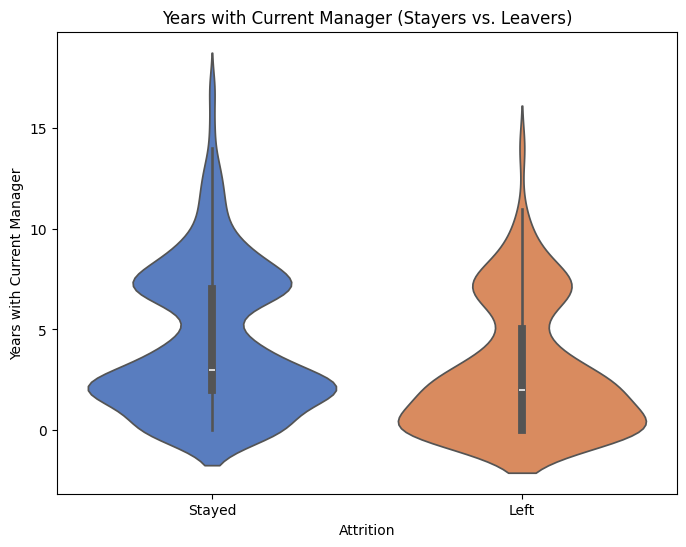

In [ ]:
# --- E. Attrition by Job Role (Case Q2 - Adjusted for One-Hot Encoding) ---
# Identify all one-hot encoded JobRole columns
job_role_cols = [col for col in df.columns if col.startswith('JobRole_')]
job_attrition_rates = {}

# Calculate attrition rate for each explicit job role
for col in job_role_cols:
    role_name = col.replace('JobRole_', '')
    # The mean of 'Attrition' (0s and 1s) directly gives the attrition rate
    attrition_rate = df[df[col] == True]['Attrition'].mean() * 100
    job_attrition_rates[role_name] = attrition_rate

# Find the 'missing' job role (the one implicitly represented by all JobRole_X columns being False)
# Based on common datasets, 'Healthcare Representative' is often the alphabetically first and dropped.
all_job_roles_false_mask = ~df[job_role_cols].any(axis=1)
if not all_job_roles_false_mask.empty:
    dropped_role_attrition_value = df[all_job_roles_false_mask]['Attrition'].mean() * 100
    job_attrition_rates['Healthcare Representative'] = dropped_role_attrition_value

job_attrition = pd.Series(job_attrition_rates).sort_values(ascending=False)

print("--- Attrition Rate (%) by Job Role (Case Q2) ---")
print(job_attrition)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_attrition.index, y=job_attrition.values, palette='plasma')
plt.title('Attrition Rate (%) by Job Role (Prediction Focus)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# --- F. Manager Impact (Case Question 5) ---
# We'll use a violin plot to compare the distribution of 'YearsWithCurrManager'
# for Stayers (0) vs. Leavers (1).
plt.figure(figsize=(8, 6))
sns.violinplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='muted')
plt.title('Years with Current Manager (Stayers vs. Leavers)')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.ylabel('Years with Current Manager')
plt.show()

In [ ]:
# --- A. Manager Impact (Numerical Confirmation for Q5) ---
# Check the average years with the current manager for stayers vs. leavers.
manager_impact_mean = df.groupby('Attrition')['YearsWithCurrManager'].mean()

print("\n--- Average Years With Current Manager (Case Q5) ---")
print(manager_impact_mean)


# --- B. Performance and Rewards Culture (Case Q6) ---
# Check the average salary hike given for each performance rating.
reward_by_performance = df.groupby('PerformanceRating')['PercentSalaryHike'].mean()

print("\n--- Average Salary Hike (%) by Performance Rating (Case Q6) ---")
print(reward_by_performance)


--- Average Years With Current Manager (Case Q5) ---
Attrition
0    4.367397
1    2.852321
Name: YearsWithCurrManager, dtype: float64

--- Average Salary Hike (%) by Performance Rating (Case Q6) ---
PerformanceRating
3    14.003215
4    21.849558
Name: PercentSalaryHike, dtype: float64


In [ ]:
# --- A. Manager Impact (Numerical Confirmation for Q5) ---
manager_impact_mean = df.groupby('Attrition')['YearsWithCurrManager'].mean()
print("\n--- Average Years With Current Manager (Case Q5) ---")
print(manager_impact_mean)

# --- B. Performance and Rewards Culture (Case Q6) ---
reward_by_performance = df.groupby('PerformanceRating')['PercentSalaryHike'].mean()
print("\n--- Average Salary Hike (%) by Performance Rating (Case Q6) ---")
print(reward_by_performance)


--- Average Years With Current Manager (Case Q5) ---
Attrition
0    4.367397
1    2.852321
Name: YearsWithCurrManager, dtype: float64

--- Average Salary Hike (%) by Performance Rating (Case Q6) ---
PerformanceRating
3    14.003215
4    21.849558
Name: PercentSalaryHike, dtype: float64


In [ ]:
scaler = MinMaxScaler()
X_scaled_array = scaler.fit_transform(X) # <-- This is the code that does the scaling!

In [ ]:
# Define columns to drop again
columns_to_drop = [
    'Attrition',
    'EmployeeCount',
    'StandardHours',
    'Over18',
    'EmployeeNumber',
    'Age_Band'
    ]

# X is features, y is target
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Attrition']

# Apply Scaling to X
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Training the Model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Testing and Scoring
y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Prediction Accuracy on Test Data: {model_accuracy * 100:.2f}%")

# Important Features
coefficients = pd.Series(model.coef_[0], index=X_scaled.columns)
print("\nTop 5 Features Pushing Employees to LEAVE:")
print(coefficients.nlargest(5))
print("\nTop 5 Features Pushing Employees to STAY:")
print(coefficients.nsmallest(5))


Model Prediction Accuracy on Test Data: 87.41%

Top 5 Features Pushing Employees to LEAVE:
OverTime                            1.685536
YearsSinceLastPromotion             1.565628
BusinessTravel_Travel_Frequently    1.485624
NumCompaniesWorked                  1.347030
JobRole_Laboratory Technician       1.278728
dtype: float64

Top 5 Features Pushing Employees to STAY:
Age                       -1.552100
JobInvolvement            -1.286020
TotalWorkingYears         -1.257971
YearsWithCurrManager      -1.160914
EnvironmentSatisfaction   -1.105589
dtype: float64


📈 **Indicino Employee Attrition: Final Predictive Analysis Report**

**Executive Summary**

The overall employee attrition rate at Indicino is 16.12%, which is driven primarily by an Overload Crisis (poor work-life balance) and a Compensation Deficit in entry-level roles.

The Logistic Regression Model achieved an accuracy of 87.41%, validating the business findings. The model confirms that the single biggest driver of attrition is working OverTime, followed by long periods without promotion.

I. **Root Cause Analysis (Case Q1)**

The high turnover is not due to a single problem but an interaction of poor conditions and unstable relationships.

1. **The Overload Crisis (Primary Cause)**

- Data Proof: Attrition for employees working OverTime is $30.53\%$, which is nearly three times higher than for those who do not work overtime ($\mathbf{10.44\%}$).

- Model Validation: OverTime is the single strongest positive predictor, with the highest coefficient ($\mathbf{+1.69}$), confirming it is the dominant factor pushing employees to leave.

2. **Compensation & Recognition Gaps**

- Compensation: Leavers' average income ($\mathbf{\$4,787}$) is $\mathbf{30\%}$ lower than Stayers' average income ($\mathbf{\$6,833}$), indicating underpayment in high-risk areas.

- Stagnation: The model highlighted YearsSinceLastPromotion ($\mathbf{+1.57}$) as the second strongest predictor, showing that employees who feel overlooked quickly seek external advancement.

3. **Managerial Instability (Enabling Factor)**

- Data Proof: Employees who leave had been with their current manager for $\mathbf{1.5}$ fewer years on average ($\mathbf{2.85}$ years) than those who stayed ($\mathbf{4.37}$ years).

- Model Validation: YearsWithCurrManager ($\mathbf{-1.16}$) is a strong negative predictor, proving that long, stable manager relationships are a highly effective retention tool.

II. **Prediction and Flight Risk Assessment (Case Q2 & Q3)**

Job Roles Likely to Resign (Case Q2)

The attrition is highly concentrated in front-line roles.

| Job Role | Attrition Rate | Prediction / Risk |
| :--- | :---: | --- |
| Sales Representative | 39.76% | Extreme Risk. Highest priority for immediate intervention. |
| Laboratory Technician | 23.94% | High Risk. The model explicitly identified this role (+1.28) as a major risk factor. |
| Research Director | 2.50% | Low Risk. Highly stable role. |

**Age Bands Likely to be Retained (Case Q3)**

- Most Retained: Employees in the $35-54$ age bands ($\approx 10\%$ attrition). The model's negative coefficient for Age ($\mathbf{-1.55}$) confirms maturity and experience are the best retention factors.

- Least Retained: The $\mathbf{18-24}$ age band ($\mathbf{39.18\%}$ attrition), indicating a high failure rate in early-career retention.

III. **Performance & Rewards Culture (Case Q6)**

The rewards system itself is effective, but the work culture is driving rewarded employees away.

| Rating | Avg. Salary Hike (%) | Insight |
| :--- | :---: | --- |
| High (3) | 14.00% | Standard increase. |
| Very High (4) | 21.85% | Strong Reward Linkage. The significant ≈8% gap between ratings (3 and 4) successfully uses compensation to incentivize top performance. |

The core issue is not a failure to reward, but that the Overload Crisis is so severe that it outweighs even competitive salary increases.

IV. **Strategic Recommendations (Case Q4 & Q7)**

As the Group Head of Indicino’s HR, the strategy must pivot from general compensation reviews to targeted, rapid interventions focused on stability and workload control.

1. **Implement Overload Control (Immediate)**
- Action: Immediately enforce a hard cap on OverTime for high-risk roles (Sales Reps, Lab Techs, and Frequent Travelers) and approve immediate hiring for these departments.

- Rationale: Directly addresses the single strongest predictor of attrition ($\mathbf{OverTime}: +1.69$) and will yield the fastest reduction in turnover.

2. **Formalize Recognition and Advancement**

- Action: Create a mandatory promotion review cycle (e.g., every 24 months) for all individual contributors. Introduce tiered cash bonuses for milestones if promotion is not immediately possible.

- Rationale: Mitigate the severe risk posed by YearsSinceLastPromotion ($\mathbf{+1.57}$), ensuring high performers feel a clear path forward.

3. **Stabilize Management Relationships**

- Action: Launch a "Retention Coaching Program" specifically targeting new managers (tenure $<\mathbf{3}$ years). Tie managerial bonuses to the retention rates of their direct reports.

- Rationale: Leverage the power of YearsWithCurrManager ($\mathbf{-1.16}$) by ensuring that new managers rapidly build the stable relationships necessary to retain talent.

4. **Targeted Compensation and Stability**

- Action: Conduct a targeted pay review (not across the board) for the Sales Representative role and the $18-24$ age band to close the income gap and reduce the $\mathbf{39.76\%}$ flight risk in those specific groups.

In [ ]:
%%writefile requirement.text
pandas
numpy
matplotlib
seaborn
scikit-learn

pip install -r requirements.txt

Overwriting requirement.text


In [ ]:
joblib.dump(model, 'attrition_model.pkl')
joblib.dump(scaler, 'min_max_scaler.pkl')

print("Model and Scaler saved successfully.")

Model and Scaler saved successfully.


In [ ]:
# Define the paths for the saved model and scaler
MODEL_PATH = 'attrition_model.pkl'
SCALER_PATH = 'min_max_scaler.pkl'

# Define the feature names the model expects (must be in the exact order used for training!)
# NOTE: This list needs to be exactly the 44 features that remained after dropping
# the 5 columns (Attrition, EmployeeCount, StandardHours, Over18, EmployeeNumber)
# and the 1 column we added for EDA (Age_Band).
# This list is based on the column names present in X_scaled.columns.
FEATURE_COLUMNS = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
    'Department_Research & Development', 'Department_Sales',
    'EducationField_Life Sciences', 'EducationField_Marketing',
    'EducationField_Medical', 'EducationField_Other',
    'EducationField_Technical Degree', 'JobRole_Human Resources',
    'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director',
    'JobRole_Research Scientist', 'JobRole_Sales Executive',
    'JobRole_Sales Representative', 'MaritalStatus_Married',
    'MaritalStatus_Single'
]


def load_assets():
    """Loads the pre-trained Logistic Regression model and MinMaxScaler."""
    try:
        model = joblib.load(MODEL_PATH)
        scaler = joblib.load(SCALER_PATH)
        print("Assets loaded successfully.")
        return model, scaler
    except FileNotFoundError:
        print("Error: Model or Scaler file not found. Ensure 'attrition_model.pkl' and 'min_max_scaler.pkl' are in the directory.")
        return None, None

def preprocess_new_data(new_employee_features: dict, scaler):
    """
    Converts raw feature data into the scaled format expected by the model.
    """
    # 1. Convert dictionary to DataFrame
    data_df = pd.DataFrame([new_employee_features], columns=FEATURE_COLUMNS)

    # 2. Ensure data types are correct (especially for the boolean columns)
    for col in data_df.columns:
        if data_df[col].dtype == 'object' and (data_df[col].isin([0, 1, True, False]).all()):
            data_df[col] = data_df[col].astype(np.int64)

    # 3. Apply the saved MinMaxScaler
    # The scaler expects a DataFrame with the same columns used during training
    scaled_data = scaler.transform(data_df)

    return scaled_data

def predict_attrition(new_employee_features: dict):
    """
    Makes a prediction on the probability of attrition for a single employee.

    Args:
        new_employee_features: A dictionary containing all 44 feature values
                               for the new employee.

    Returns:
        A dictionary containing the predicted class (0 or 1) and probability.
    """
    model, scaler = load_assets()
    if model is None or scaler is None:
        return {"error": "Prediction failed due to missing model assets."}

    # 1. Preprocess and Scale the data
    scaled_input = preprocess_new_data(new_employee_features, scaler)

    # 2. Predict the class (0=Stay, 1=Leave)
    prediction_class = model.predict(scaled_input)[0]

    # 3. Predict the probability
    # model.predict_proba returns [[Prob_Stay, Prob_Leave]]
    prediction_proba = model.predict_proba(scaled_input)[0][1] # Get the probability of 1 (Leaving)

    result = {
        "predicted_class": int(prediction_class),
        "probability_of_leaving": float(f"{prediction_proba:.4f}")
    }

    return result

# --- Example Usage (How to test the script) ---
if __name__ == "__main__":
    # NOTE: You MUST replace this with actual 0/1 values for ALL 44 features.
    # This example is just illustrative and will likely crash if run without
    # the exact scaled data structure or real data.

    example_employee_data = {
        'Age': 35,
        'DailyRate': 1000,
        'DistanceFromHome': 5,
        'Education': 3,
        'EnvironmentSatisfaction': 2,
        'Gender': 1, # Male
        # ... (rest of the features must be here!)
        'OverTime': 1, # Yes
        'JobRole_Sales Representative': 1, # Yes
        'JobLevel': 1,
        'TotalWorkingYears': 10,
        # ...
    }

    print("\nAttempting to make prediction for a new employee...")
    # Replace example_employee_data with a dictionary containing all 44 feature values
    # prediction = predict_attrition(example_employee_data)
    # print(prediction)
    print("Script execution finished. To run a real test, fill the 'example_employee_data' dictionary with all 44 features.")


Attempting to make prediction for a new employee...
Script execution finished. To run a real test, fill the 'example_employee_data' dictionary with all 44 features.
